# Importing basic libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data reading and exploration:

In [2]:
data = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\jobs_in_data.csv")
data

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [13]:
print(f"The number of rows in the dataset is {data.shape[0]}\nThe number of columns in the data set is {data.shape[1]}")

The number of rows in the dataset is 9355
The number of columns in the data set is 12


In [3]:
data.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


In [17]:
#checking the description of the non-numeric features as well

data.describe(include='object')

,job_title,job_category,salary_currency,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
count,9355,9355,9355,9355,9355,9355,9355,9355,9355
unique,125,10,11,83,4,4,3,70,3
top,Data Engineer,Data Science and Research,USD,United States,Senior,Full-time,In-person,United States,M
freq,2195,3014,8591,8086,6709,9310,5730,8132,8448


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [5]:
data.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [22]:
# summarizing the data description in the form of DataFrame

pd.DataFrame({'Count':data.shape[0], 'Null':data.isnull().sum(),'Diversity':data.nunique()})

,Count,Null,Diversity
work_year,9355,0,4
job_title,9355,0,125
job_category,9355,0,10
salary_currency,9355,0,11
salary,9355,0,1507
salary_in_usd,9355,0,1786
employee_residence,9355,0,83
experience_level,9355,0,4
employment_type,9355,0,4
work_setting,9355,0,3


In [20]:
data.duplicated().sum()

4014

In [29]:
percentage_duplication = (data.duplicated().sum() / data.shape[0]) *100
print("Percentage duplication in the data is", percentage_duplication)

Percentage duplication in the data is 42.90753607696419


***The duplication percentage in the data is quite high, so we can not remove the duplicated data. The percentage is quite considerable because a specific position/role might have the same work setting and salary in a certain country. So we can conclude that the percentage do not represent duplicated values but different entries from the survey which had the same responses.***

# Data Visualization and analysis:

In [34]:
# Calculate the frequency and proportion of occurrences for each unique value in the "work_year" column

data_work = data['work_year'].value_counts().reset_index()
data_work.columns = ['work_year', 'count']
data_work = data_work.sort_values(by = 'count', ascending=False)
print(data_work)

   work_year  count
0       2023   7453
1       2022   1634
2       2021    197
3       2020     71


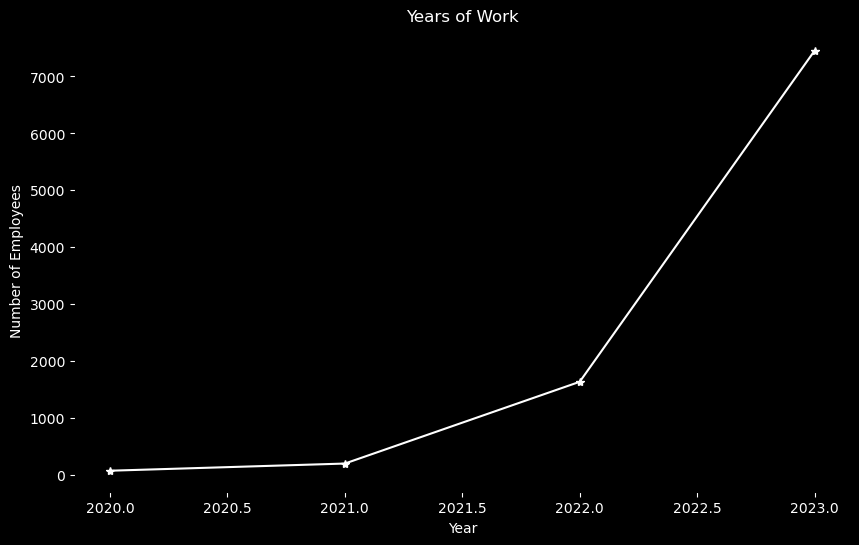

In [52]:
plt.figure(figsize=(10,6))
year_counts = data['work_year'].value_counts().sort_index()
plt.plot(year_counts.index, year_counts.values, marker='*',linestyle='-',color="white")
plt.xlabel("Year", color = 'white' )
plt.ylabel("Number of Employees", color = 'white')
plt.title("Years of Work", color = 'white')
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.gca().tick_params(axis='x',colors='white')
plt.gca().tick_params(axis='y',colors='white')
plt.show()

***From here we can conclude that the dataset includes work year from 2020 to 2023 with the highest amount of data from the year 2023***

***Each job category consists of several similar job titles depending on the main field. Fo instance if we consider job category Data Engineering then it includes several job titles like Data Engineer, ETL Developer, Software data engineer, etc.***

In [57]:
# Calculate the frequency of occurrences for each unique job_category in the column

data_job = data['job_category'].value_counts().reset_index()
data_job.columns = ['Job_Category', 'Count']
data_job = data_job.sort_values(by='Count', ascending=False)
print(data_job)

                     Job_Category  Count
0       Data Science and Research   3014
1                Data Engineering   2260
2                   Data Analysis   1457
3         Machine Learning and AI   1428
4       Leadership and Management    503
5            BI and Visualization    313
6  Data Architecture and Modeling    259
7    Data Management and Strategy     61
8     Data Quality and Operations     55
9              Cloud and Database      5


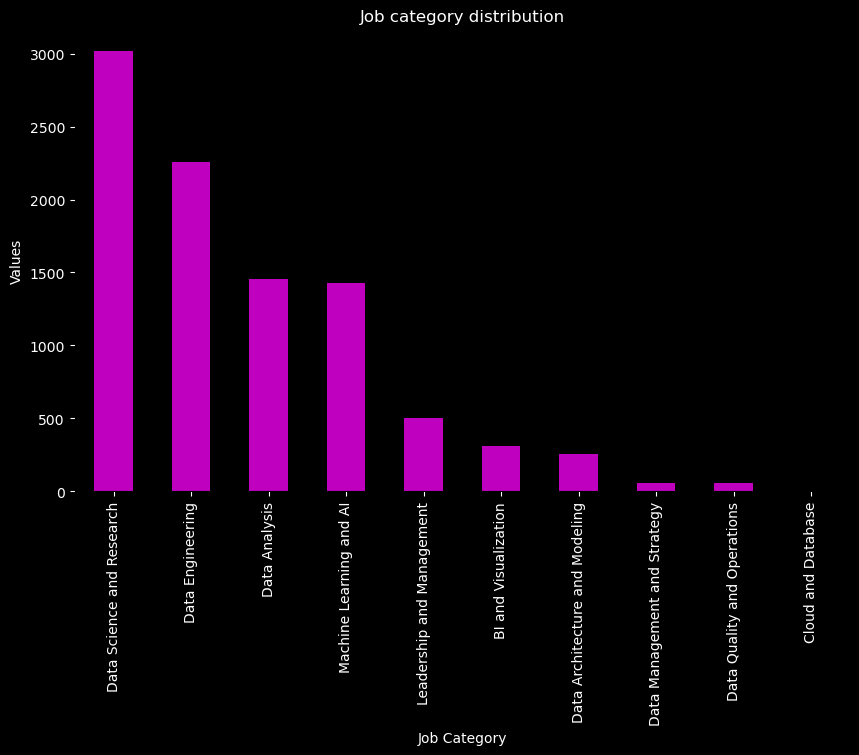

In [61]:
plt.figure(figsize=(10,6))
data['job_category'].value_counts().plot(kind='bar', color = 'm')
plt.xlabel("Job Category", color = 'white' )
plt.ylabel("Values", color = 'white')
plt.title("Job category distribution", color = 'white')
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.gca().tick_params(axis='x',colors='white')
plt.gca().tick_params(axis='y',colors='white')
plt.show()

***From here we can say that our data consists of 10 different job category's data. The Data Science and Research being the category with highest number of jobs, followed by Data Engineering, Data Analysis and Machine Learning AI. On the other hand, Cloud and Database is the job category with least number of jobs availablity.***

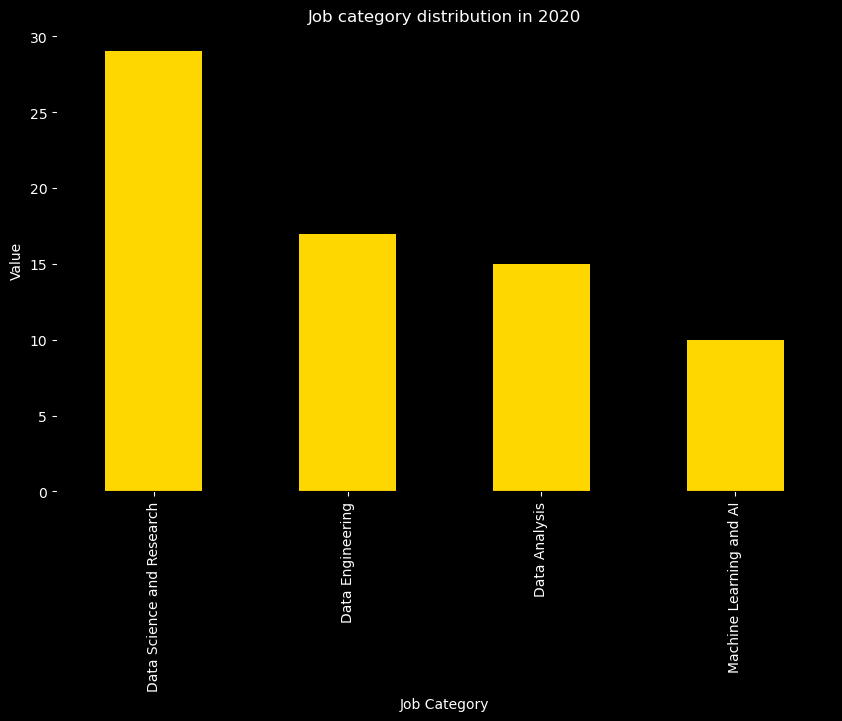

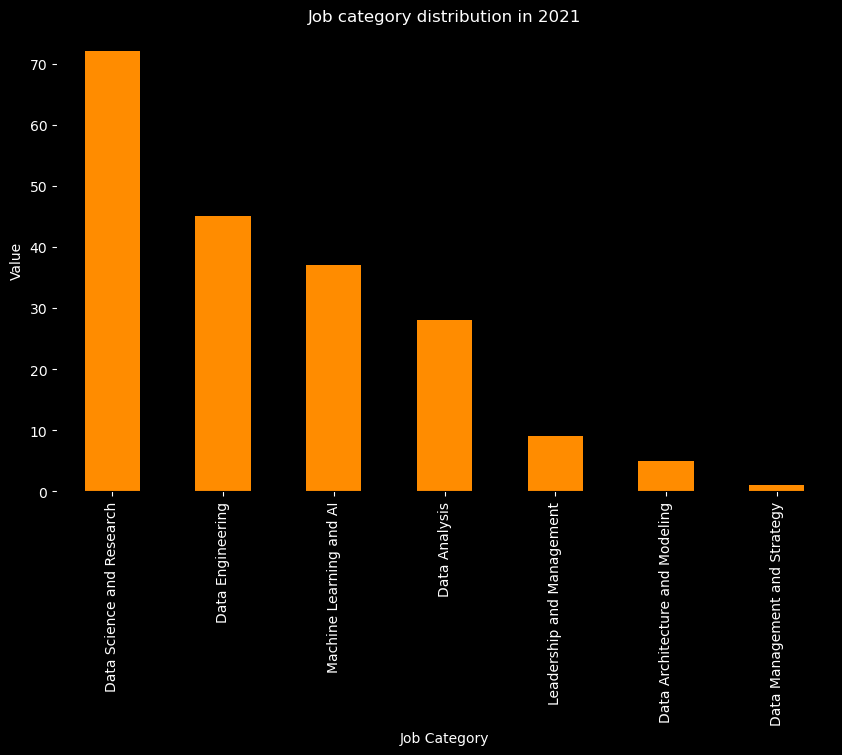

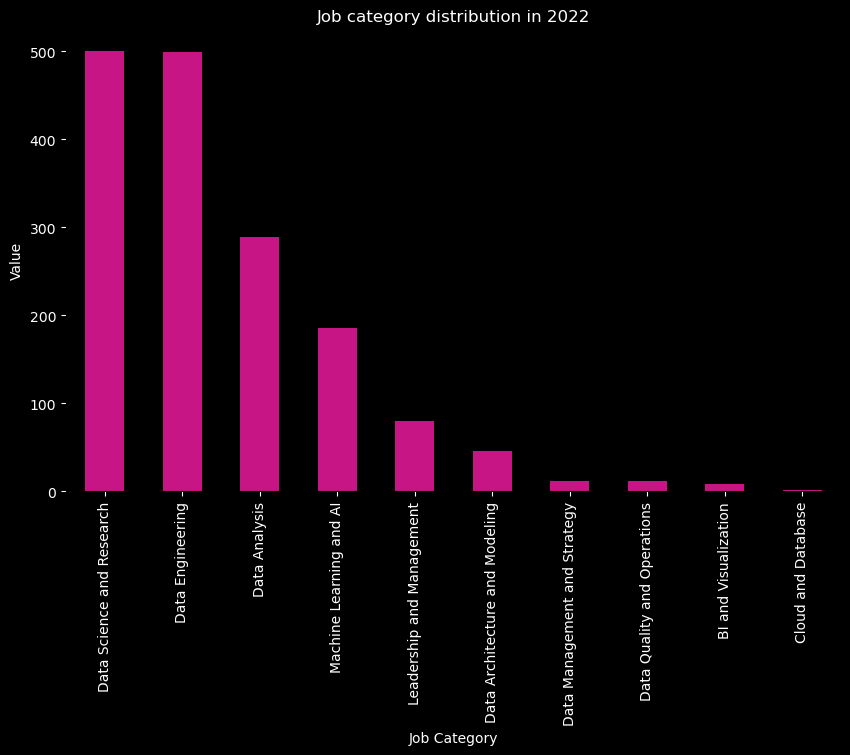

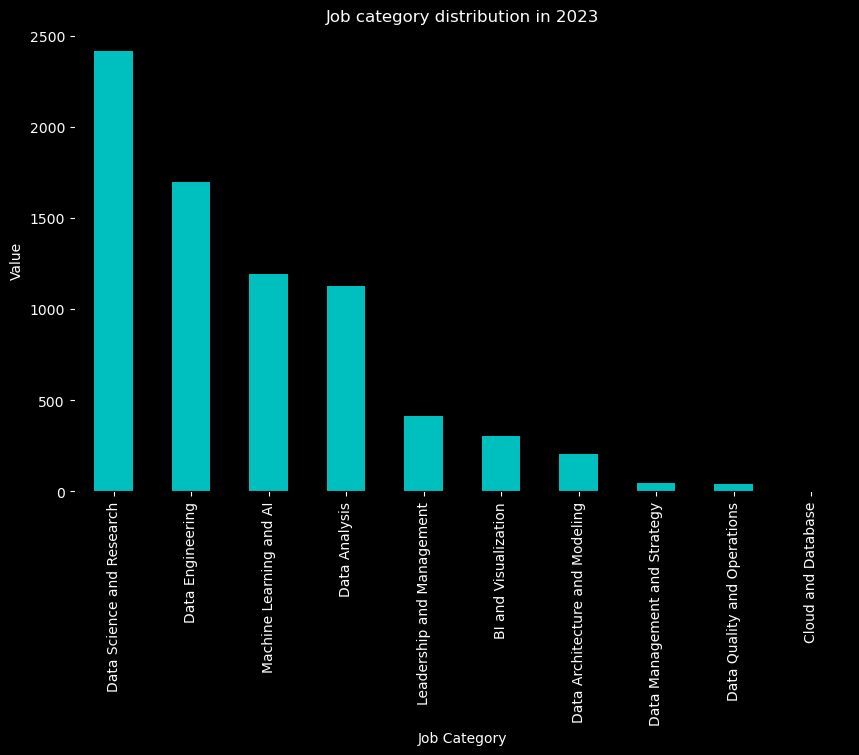

In [68]:
# now we will try to understand the job category distribution every year

data_job_category = data.groupby('work_year')['job_category'].value_counts()
colors = ['gold','darkorange','mediumvioletred','c']
j = 0
for i in range(2020,2024):
    plt.figure(figsize=(10,6))
    data_job_category[i].plot(kind='bar', color = colors[j])
    plt.xlabel("Job Category", color = 'white' )
    plt.ylabel("Value", color = 'white')
    plt.title(f"Job category distribution in {i}", color = 'white')
    plt.gca().set_facecolor('black')
    plt.gcf().set_facecolor('black')
    plt.gca().tick_params(axis='x',colors='white')
    plt.gca().tick_params(axis='y',colors='white')
    plt.show()
    j+=1
    

***Above ggraphs help us to understand yearwise job category distribution. In year 2020 data was offering jobs in only four categories, viz. Data science and research, Data engineering, Data Analysis and ML and AI in the descending order respectively. In 2021, the job categories increased to seven adding Leadership & Management, Data Architecture & modelling, and Data management& startegy as new categories. But this year also, Data Science and Research remained the most job offering category. In year 2022, the catgories in which data offered job further increased to 10. This year, Data Science & reserach and Data engineering became the categories offering same amount of jobs and were higest amongst the other categories. In 2023, the number of categories remained same but again, Data Science & research offered more jobs as compared to ther categories.***

***Now we will find the job titles included in each job category and try to find job titles the job seeker can concentrate on***

In [70]:
data['job_category'].unique()

array(['Data Engineering', 'Data Architecture and Modeling',
       'Data Science and Research', 'Machine Learning and AI',
       'Data Analysis', 'Leadership and Management',
       'BI and Visualization', 'Data Quality and Operations',
       'Data Management and Strategy', 'Cloud and Database'], dtype=object)

In [74]:
data_jobcategory = ['Data Engineering', 'Data Architecture and Modeling', 'Data Science and Research', 'Machine Learning and AI',
       'Data Analysis', 'Leadership and Management', 'BI and Visualization', 'Data Quality and Operations','Data Management and Strategy', 'Cloud and Database']

j=0
for j in range (0,9):
    print(f"Job title distribution in {data_jobcategory[j]} category")
    data_science_df = data[data['job_category'] == data_jobcategory[j]]
    data_science_tibble = data_science_df['job_title'].value_counts().reset_index()
    data_science_tibble.columns = ['job_title', 'frequency']
    print(data_science_tibble)
    print("******************************************************************************")
    j+=1

Job title distribution in Data Engineering category
                       job_title  frequency
0                  Data Engineer       2195
1                  ETL Developer         18
2   Data Infrastructure Engineer         12
3              Big Data Engineer          8
4             Lead Data Engineer          6
5            Cloud Data Engineer          4
6        Principal Data Engineer          3
7         Software Data Engineer          3
8           Data DevOps Engineer          2
9      Data Integration Engineer          2
10           Azure Data Engineer          2
11                  ETL Engineer          2
12      Consultant Data Engineer          1
13              BI Data Engineer          1
14       Marketing Data Engineer          1
******************************************************************************
Job title distribution in Data Architecture and Modeling category
              job_title  frequency
0        Data Architect        213
1          Data Modeler      

***In 2023, Data Science and reserach was the category offering the highest number of jobs, so let us check the job title distibution amongst that category, to further easy the process of job search***

In [85]:
data_science_df = data[data['job_category'] == 'Data Science and Research']
data_science_dfnew = data_science_df[data_science_df['work_year'] == 2023]
print(data_science_dfnew)

      work_year           job_title               job_category  \
3          2023      Data Scientist  Data Science and Research   
4          2023      Data Scientist  Data Science and Research   
5          2023      Data Scientist  Data Science and Research   
6          2023      Data Scientist  Data Science and Research   
13         2023      Data Scientist  Data Science and Research   
...         ...                 ...                        ...   
7469       2023  Research Scientist  Data Science and Research   
7470       2023      Data Scientist  Data Science and Research   
7471       2023      Data Scientist  Data Science and Research   
7493       2023      Data Scientist  Data Science and Research   
7494       2023      Data Scientist  Data Science and Research   

     salary_currency  salary  salary_in_usd employee_residence  \
3                USD  212000         212000      United States   
4                USD   93300          93300      United States   
5        

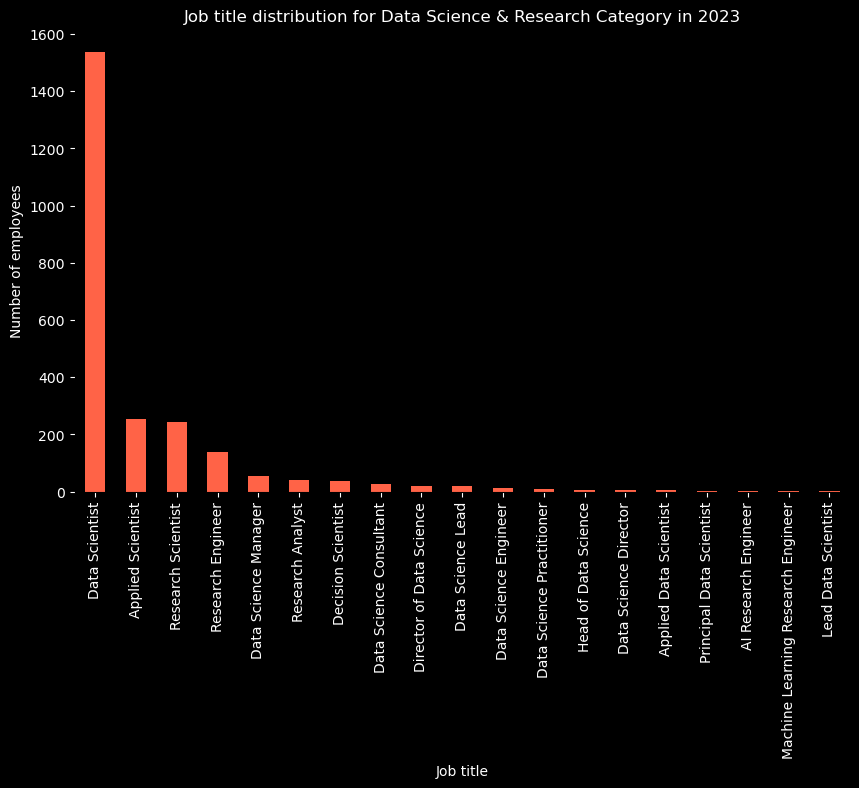

In [88]:
plt.figure(figsize=(10,6))
data_science_dfnew['job_title'].value_counts().plot(kind='bar', color = 'tomato')
plt.xlabel("Job title", color = 'white' )
plt.ylabel("Number of employees", color = 'white')
plt.title("Job title distribution for Data Science & Research Category in 2023", color = 'white')
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.gca().tick_params(axis='x',colors='white')
plt.gca().tick_params(axis='y',colors='white')
plt.show()

***From the above graph we can say that in 2023, in the category offering highest job, Data Scientists got highest employement followed by Applied scientist, Research Scientist and Reserach Engineer***

In [101]:
import plotly.express as px 
from plotly.offline import iplot , plot 
iplot(px.bar(df_job_title_USD.sort_values(ascending=False)[:10],
             orientation='h',
             labels={'value':'Salary in USD','job_title':'Job Title'},
             title='Job Title with Salaries USD',
             template='plotly_dark',
             color=df_job_title_USD.index[:10],
             text_auto=True
))

***Above graph shows us that the maximum salary was offered by the Data Engineer job. Now we will analyse the salary distribution over various job titles in different years below:***

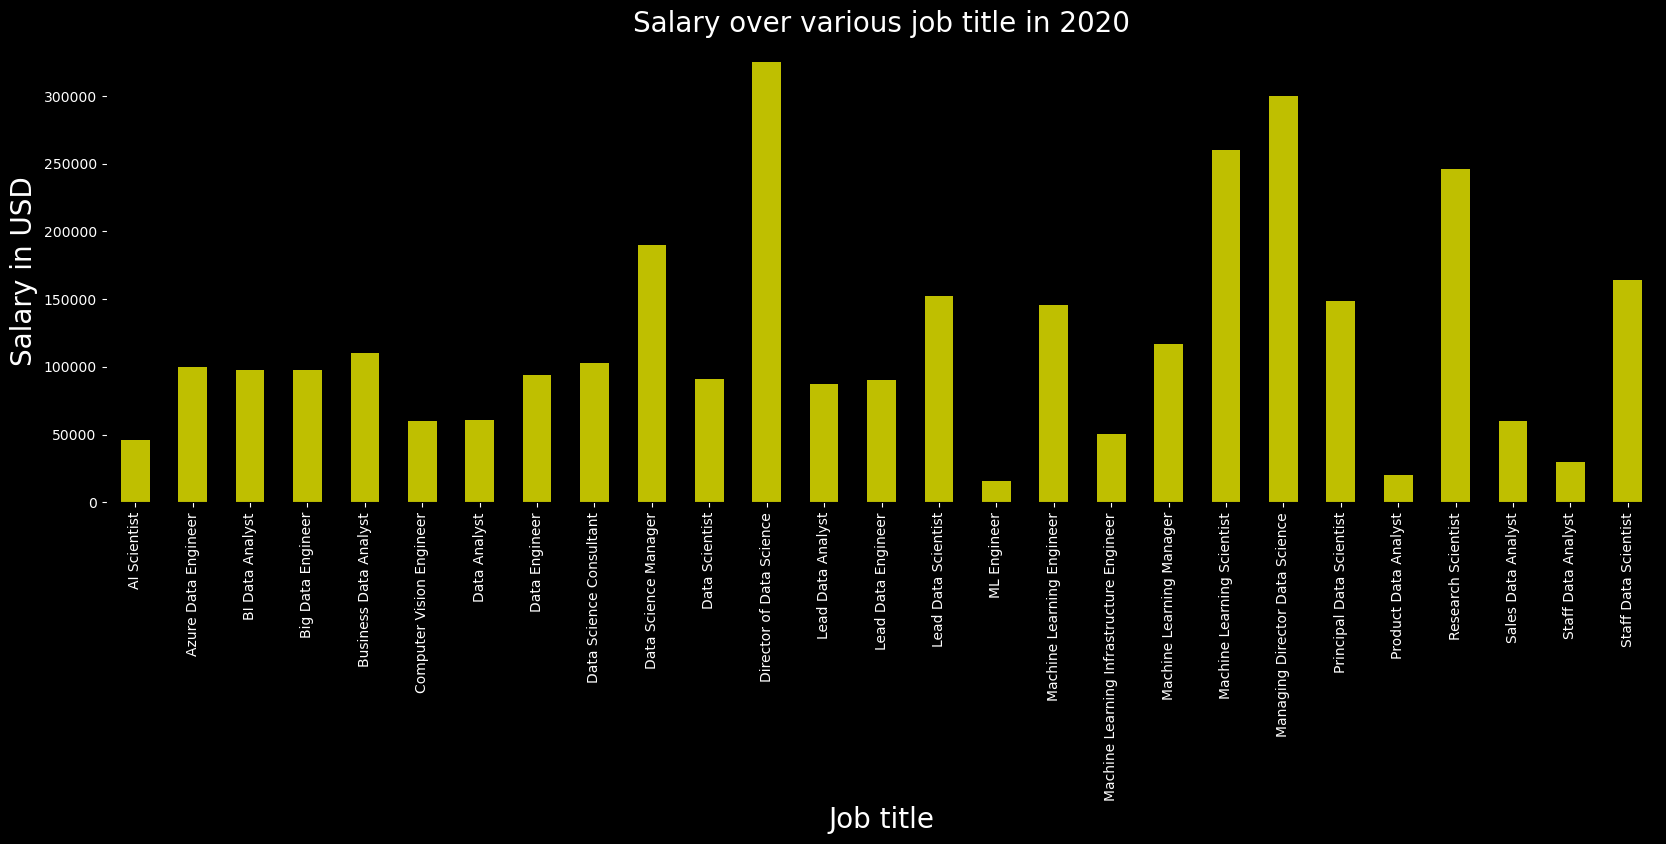

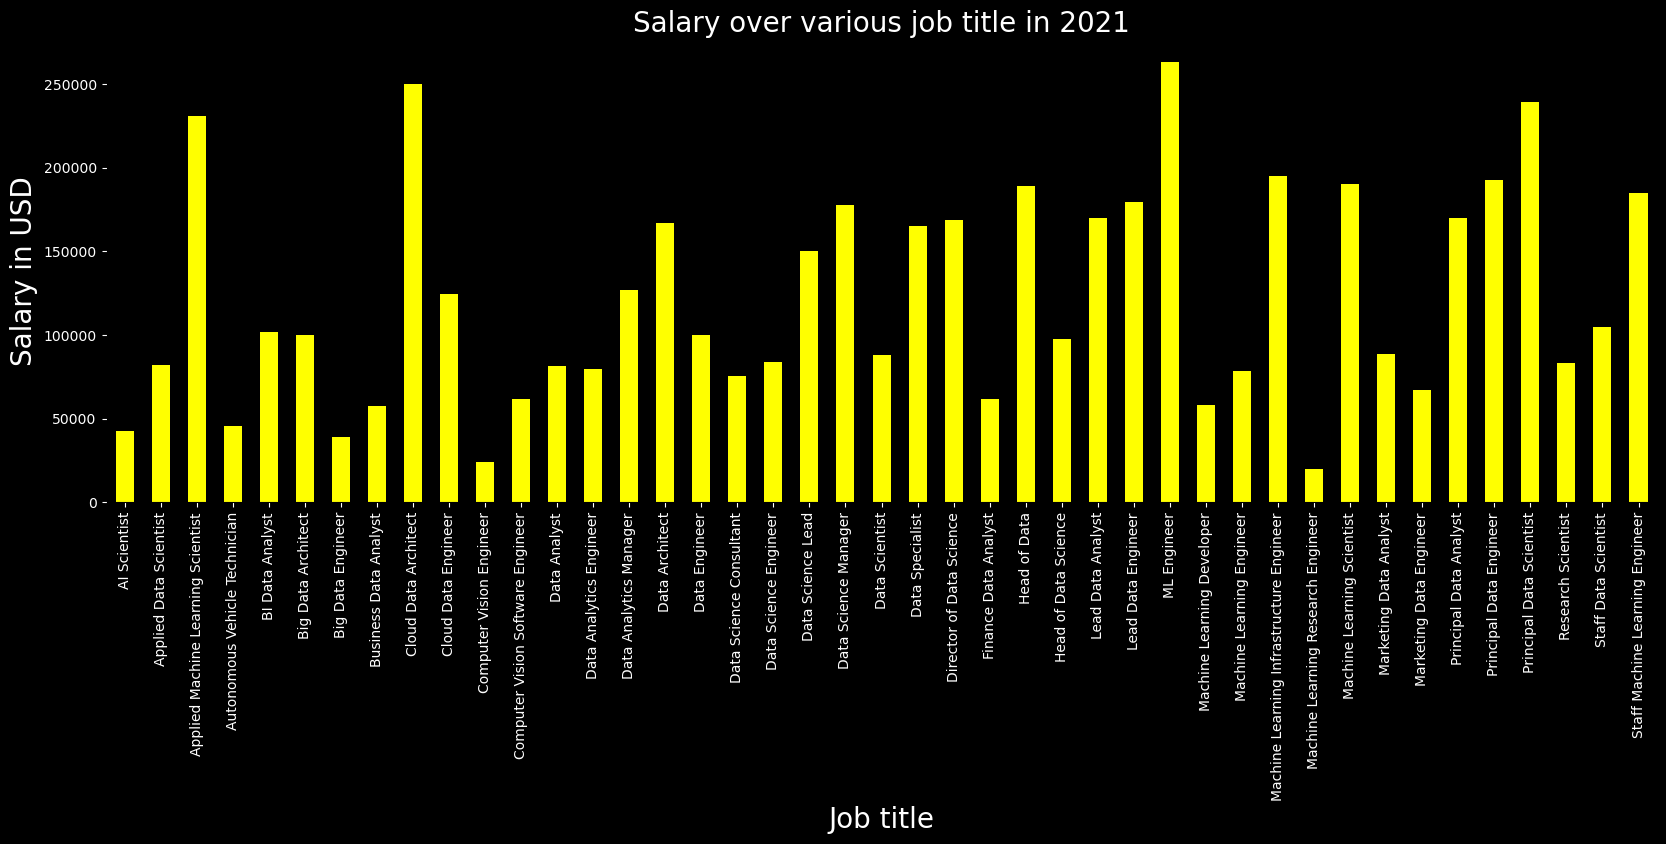

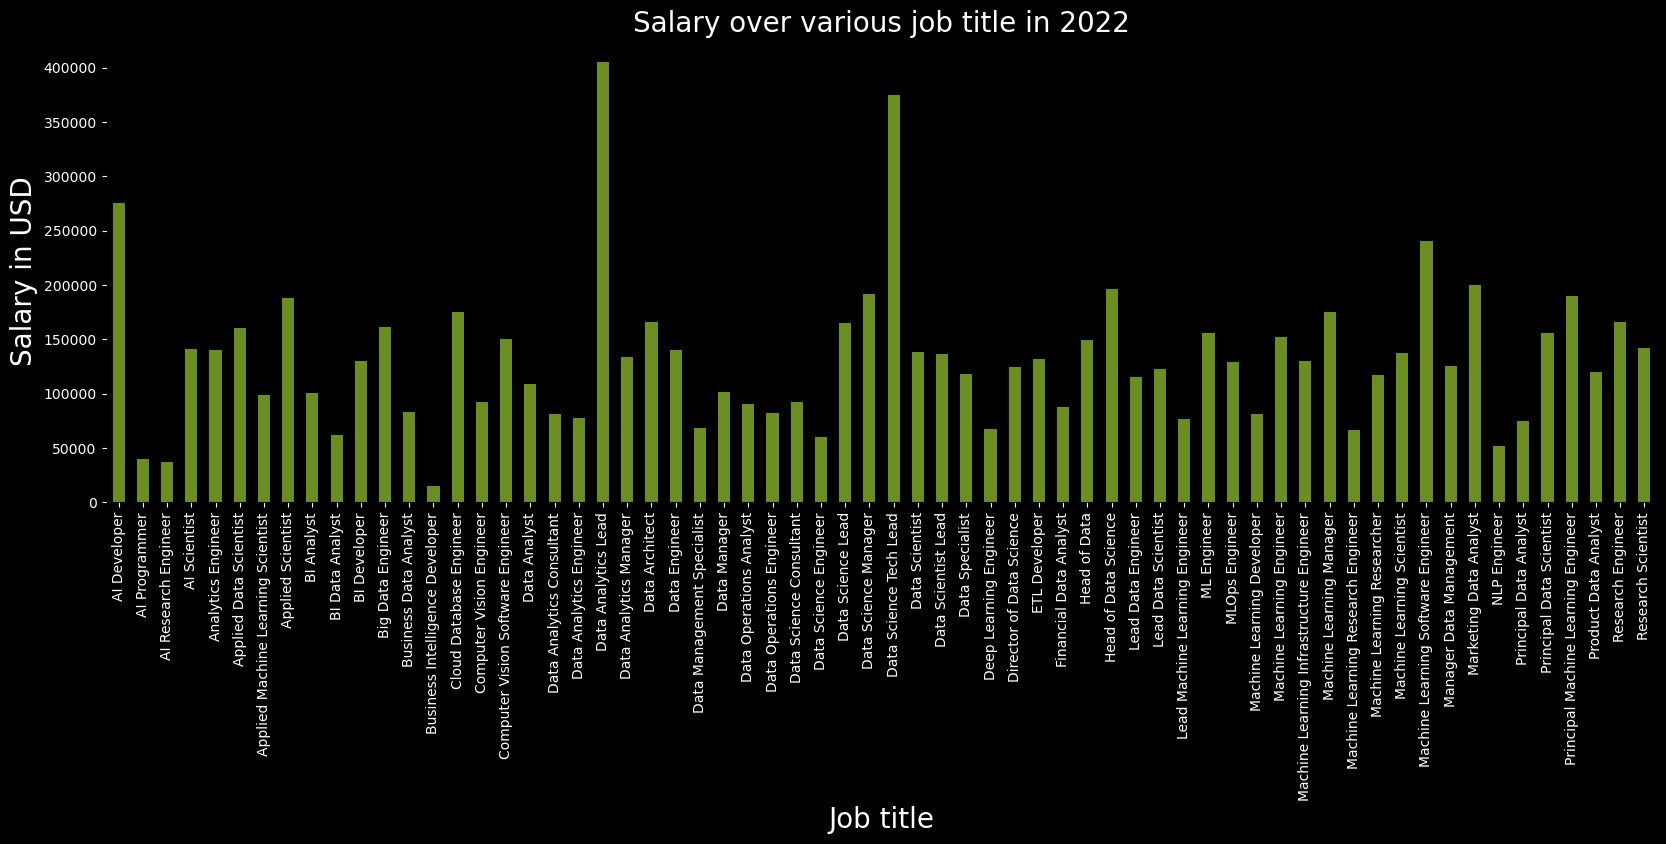

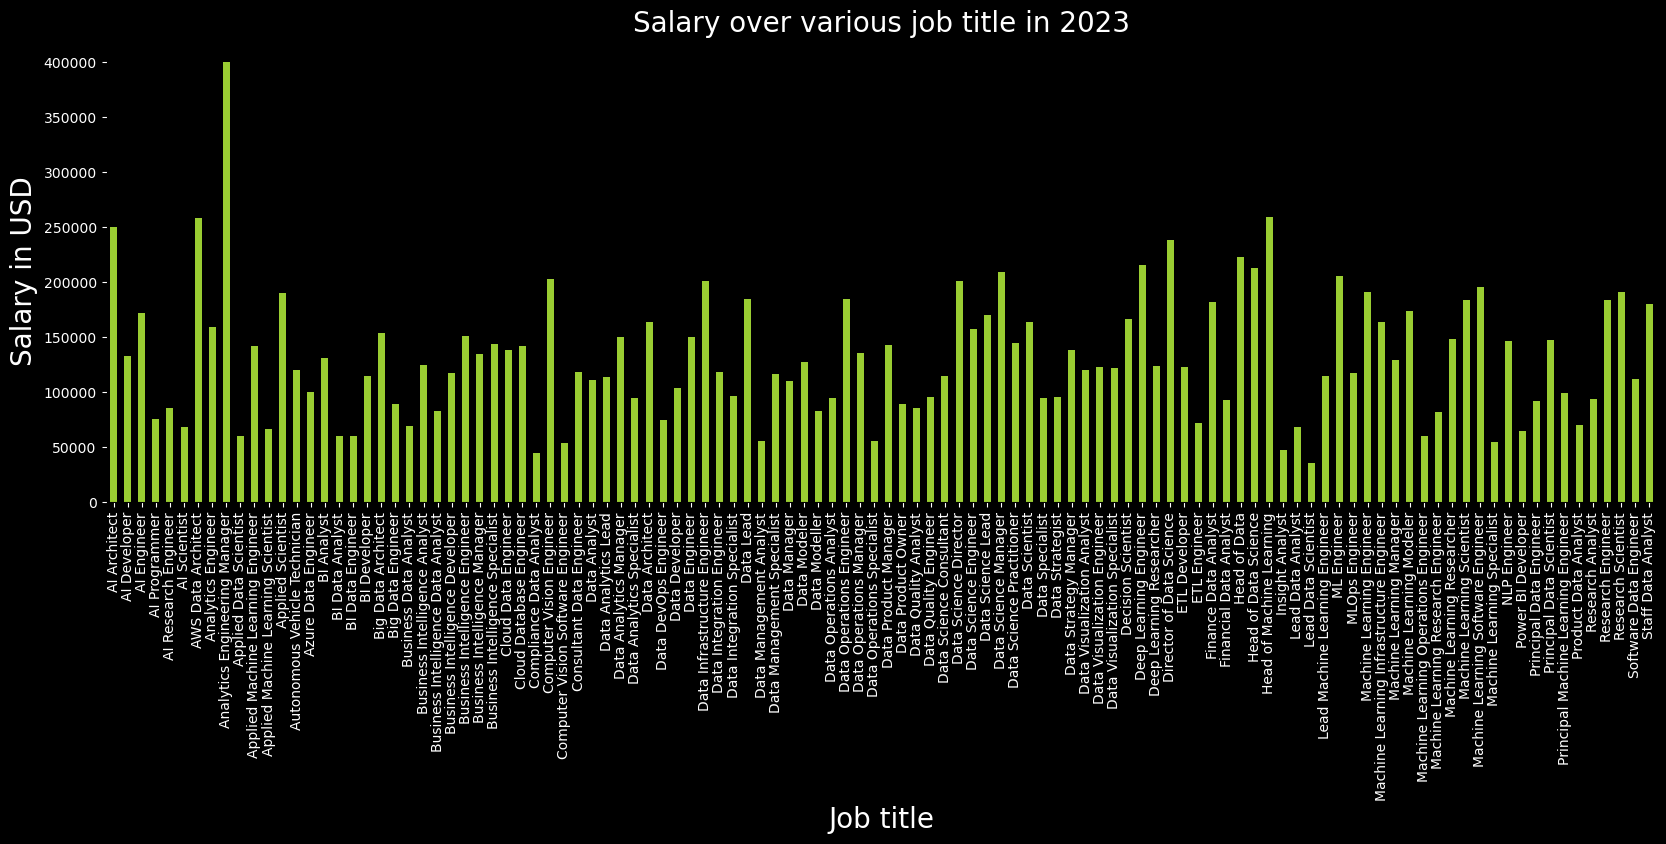

In [112]:
df_salary_in_usd = data.groupby(['work_year','job_title'])['salary_in_usd'].mean()
colors = ['y','yellow','olivedrab','yellowgreen']
j = 0
for i in range(2020,2024):
    plt.figure(figsize=(20,6))
    df_salary_in_usd[i].plot(kind='bar', color = colors[j])
    plt.xlabel("Job title", color = 'white', fontsize = 20 )
    plt.ylabel("Salary in USD", color = 'white', fontsize = 20)
    plt.title(f"Salary over various job title in {i}", color = 'white', fontsize = 20)
    plt.gca().set_facecolor('black')
    plt.gcf().set_facecolor('black')
    plt.gca().tick_params(axis='x',colors='white')
    plt.gca().tick_params(axis='y',colors='white')
    plt.show()
    j+=1

***The above graphs shows us the salary disrtibtion over different years under different job titles. Analysing these graphs will help us to selcet the job title as per the pay scale we are expecting and thus, will help the employee to prepare themselves for the particular job title***

In [139]:
data['employee_residence'].nunique()

83

***Now we can see that the dataset have data for 83 different countries, which will make it difficult to analyse it. SO we are analysing the data for only top 10 countries.***

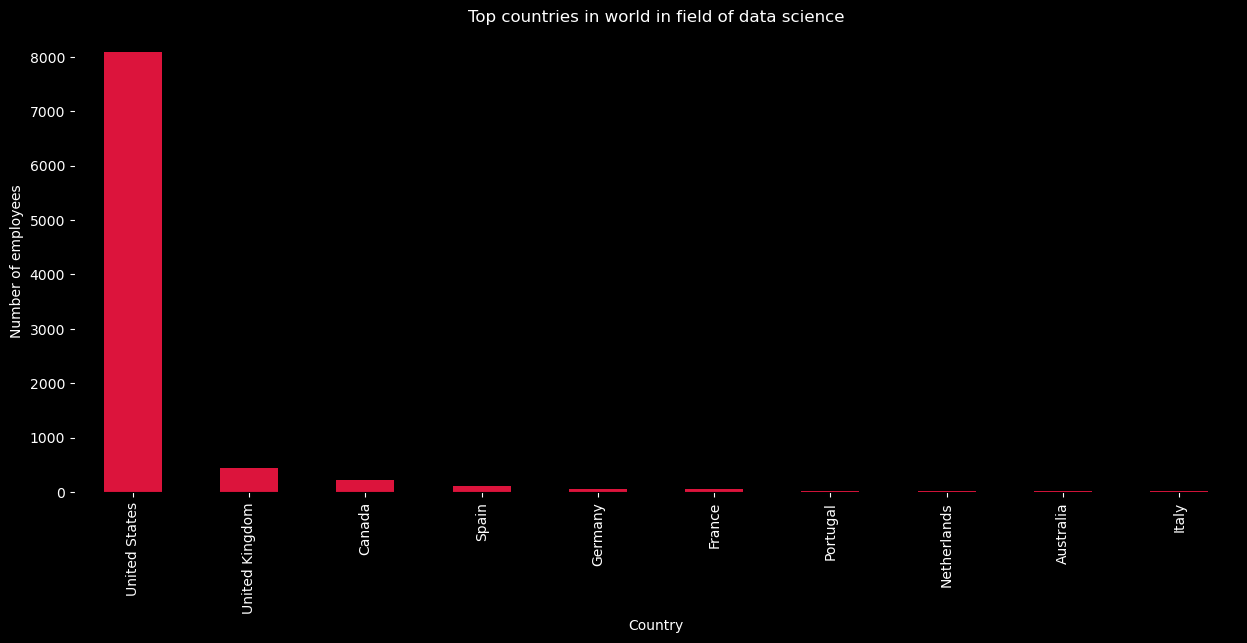

In [131]:
plt.figure(figsize = (15,6))
var = data['employee_residence'].value_counts()
var[:10:].plot(kind='bar', color = 'crimson')
plt.xlabel("Country", color = 'white' )
plt.ylabel("Number of employees", color = 'white')
plt.title("Top countries in world in field of data science", color = 'white')
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.gca().tick_params(axis='x',colors='white')
plt.gca().tick_params(axis='y',colors='white')
plt.show()

***From above graph we can say that the United states has maximum job opportunities for the data jobs followed by United Kingdom. Whereas Italy stands at 10th postion in this category.***

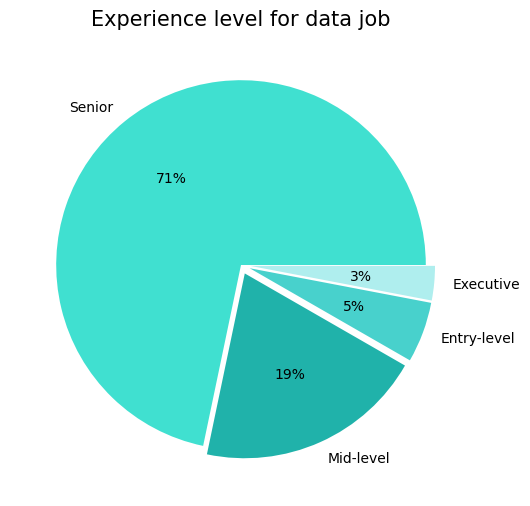

In [137]:
plt.figure(figsize=(10,6))
var1 = data['experience_level'].value_counts()
plt.pie(var1,labels=['Senior','Mid-level','Entry-level','Executive'],autopct='%i%%',colors=['turquoise','lightseagreen','mediumturquoise','paleturquoise'],explode = [0,0.05,0.05,0.05])
plt.title('Experience level for data job',fontsize=15,color='k');

***The above pie chart shows that the maximum number of employment in the field was done for people with expertise at senior level for all these 4 years.Whereas the entry-level and the executive-level jobs contibute to total of 8% of job contibution.***

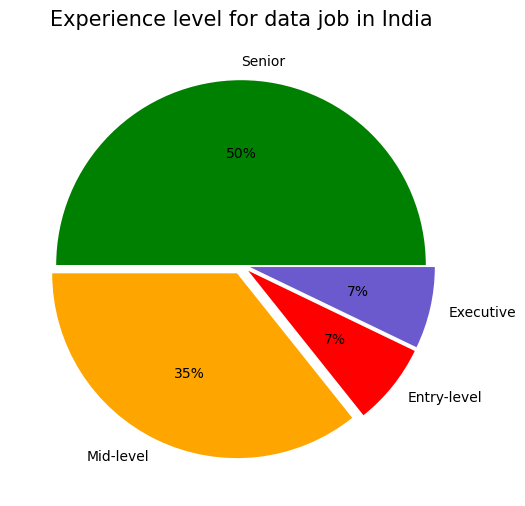

In [147]:
datajobs_india = data[data['employee_residence'] == 'India']         #creating a new data frame with only India's data
plt.figure(figsize=(10,6))
var2 = datajobs_india['experience_level'].value_counts()
plt.pie(var2,labels=['Senior','Mid-level','Entry-level','Executive'],autopct='%i%%',colors=['green','orange','red','slateblue'],explode = [0,0.05,0.05,0.05])
plt.title('Experience level for data job in India',fontsize=15,color='k');

***In Indian market the 50% of total jobs were offered for senior position whereas 14% of total jobs were offered for entry and executive level.***

In [153]:
data['employment_type'].unique()

array(['Full-time', 'Part-time', 'Contract', 'Freelance'], dtype=object)

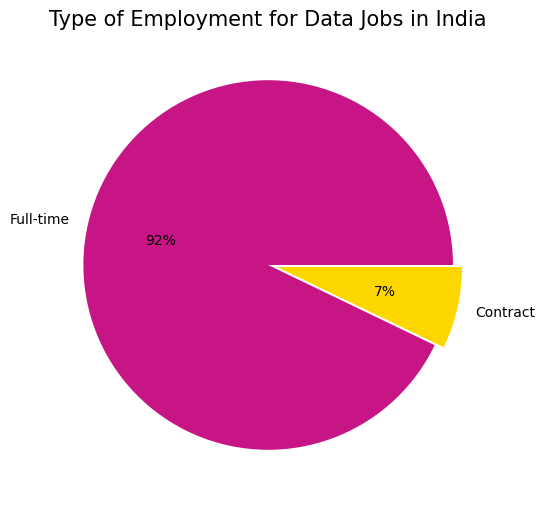

In [152]:
plt.figure(figsize=(10,6))
var3 = datajobs_india['employment_type'].value_counts()
plt.pie(var3,labels=['Full-time','Contract'],autopct='%i%%',colors=['mediumvioletred','gold'],explode = [0,0.05])
plt.title('Type of Employment for Data Jobs in India',fontsize=15,color='k');

***In Indian market most of the employemnt is full-time and only 7% of jobs are offered on contract basis.***

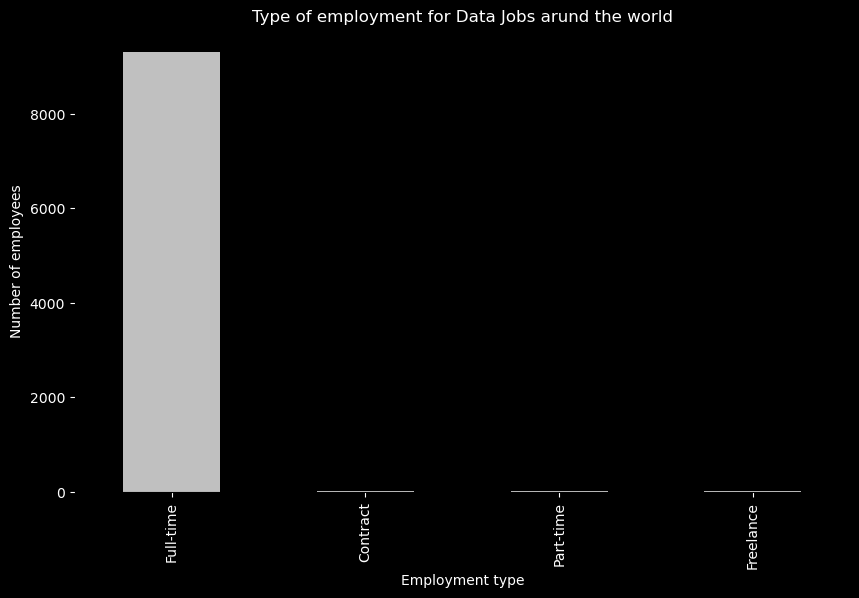

In [156]:
plt.figure(figsize=(10,6))
data['employment_type'].value_counts().plot(kind='bar', color = 'silver')
plt.xlabel("Employment type", color = 'white' )
plt.ylabel("Number of employees", color = 'white')
plt.title("Type of employment for Data Jobs arund the world", color = 'white')
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.gca().tick_params(axis='x',colors='white')
plt.gca().tick_params(axis='y',colors='white')
plt.show()

***Around the world we can see that there are four job categories, with full-time category being the dominant one***

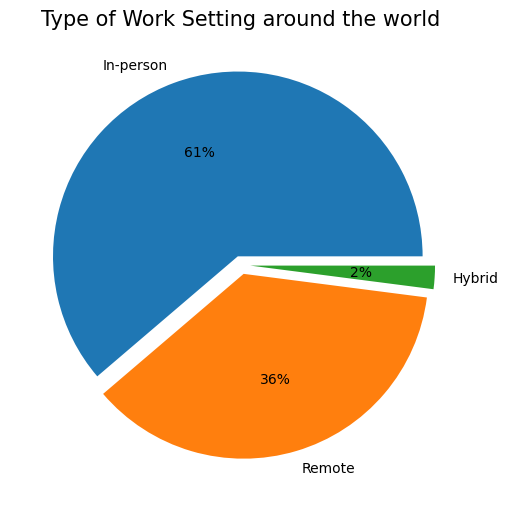

In [157]:
plt.figure(figsize=(10,6))
var4 = data['work_setting'].value_counts()
plt.pie(var4,labels=['In-person','Remote','Hybrid'],autopct='%i%%',explode = [0.05,0.05,0.05])
plt.title('Type of Work Setting around the world',fontsize=15,color='k');

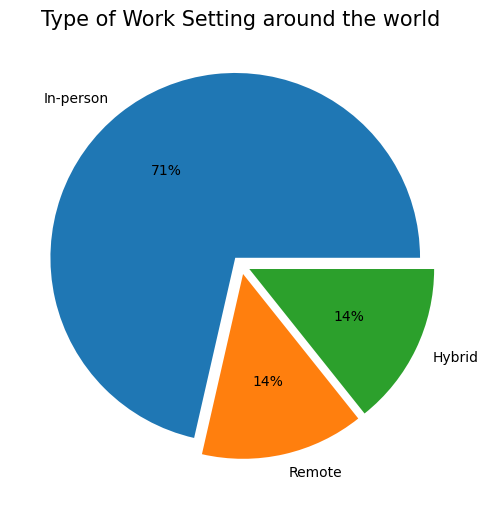

In [158]:
plt.figure(figsize=(10,6))
var4 = datajobs_india['work_setting'].value_counts()
plt.pie(var4,labels=['In-person','Remote','Hybrid'],autopct='%i%%',explode = [0.05,0.05,0.05])
plt.title('Type of Work Setting in India',fontsize=15,color='k');

***In India and all over the world, the employment with in-person type of work setting is the dominant one. But in Indian market both the Hybrid and Remote work culture exsists with same percentage.This could be great insight form the point of view of the job-seekers with limited work setting requirements.***

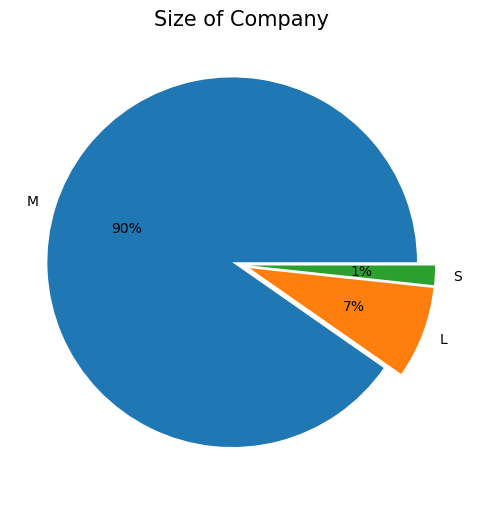

In [160]:
plt.figure(figsize=(10,6))
var5 = data['company_size'].value_counts()
plt.pie(var5,labels=['M','L','S'],autopct='%i%%',explode = [0.05,0.05,0.05])
plt.title('Size of Company',fontsize=15,color='k');

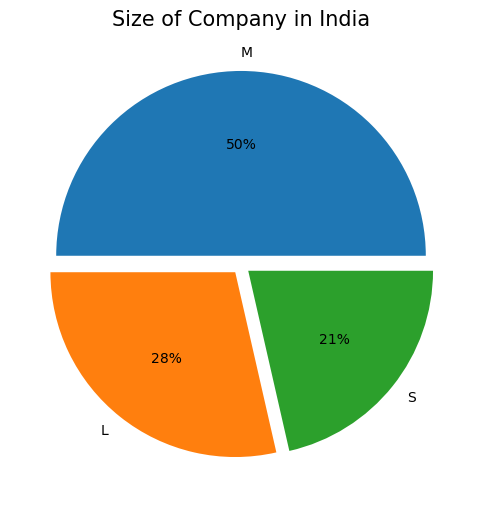

In [161]:
plt.figure(figsize=(10,6))
var6 = datajobs_india['company_size'].value_counts()
plt.pie(var6,labels=['M','L','S'],autopct='%i%%',explode = [0.05,0.05,0.05])
plt.title('Size of Company in India',fontsize=15,color='k');

***Around the world medium-size company are the major employeer whereas in india the market is distibuted 50% with medium_scale companies and 50% with large-scale and small-scale companies.***